# Bayesian_learning


**Notebook putting the excellent Machine lectures of Nando de Freitas in code/(LA)tex(t). **
We are dealing with Bayesian learning.

- Learn how Bayes rule is derived.
- apply Bayes rule 
- apply Bayesian learning to linear models
- the mechanics of conjugate analysis.

slides on:
http://www.cs.ubc.ca/~nando/540-2013/lectures/l5.pdf

The number one Git repo on Bayesian methods off course is: https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers
but also found excellent scripts on https://github.com/aloctavodia/Doing_bayesian_data_analysis
This blog is all Bayesian: http://twiecki.github.io/

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import numpy as np
import scipy.stats as stats

# path to png's
PATH = 'C:\\Users\\Egbert\\datascience\\ubc_ml\\tut_png\\bayesian_learning\\'

There is an alternative to Maximum Likelihood (ML), called Bayesian Learning. We'll see that this is a problem of integration instead of a problem of optimization. Up until now, we've seen 2 good ways to select a model: put up a large complex model, put on a regularizer, do CV to find the ideal delta and the right model complexity. But also the more data we have, the more room there is for obtaining a complex model. This is the game changer for Google's advanced **deep learning** methods. Problem they face is about scaling. 

ML gives reasonable results  but we have made the assumption that this **co-variance matrix sigma** for regression means that every point has the same variance. That doesn't make sense in areas where we have seen data. Being able to quantify uncertainty like on the right is what Bayesian models are able to add and are also key in decision making. If I have a system that doesn't passively learn from data, but also is actively gathering data, then that system needs to know what it doesn't know = good estimates of uncertainty. 

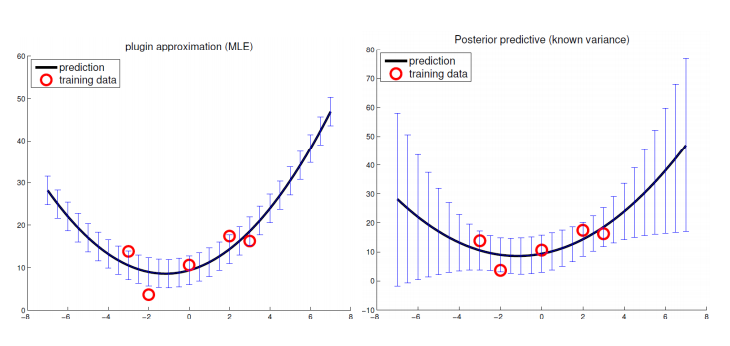

In [23]:
Image(filename = PATH + "mle_vs_bayesian.png", width=800, height=200)

No escape: fundamental law of probability is **Bayes Rule**: $P(A \rvert B) = \frac{P(B \rvert A) P(A)}{P(B)}$: it enables us to **reverse probabilities**. Bayesian inference is a key concept when studying human and animal perceptions. Parsing this formula further:

$\underset{joint distribution}{P(A \rvert B)} = \frac {\underset{conditional}{P(B \rvert A) P(A)}} {\underset{marginal}{P(B)}}$

$\int P(AB) \hspace{2mm} dA \hspace{2mm} dB = 0$ Integral is 1

$\int P(A \rvert B) \hspace{2mm} dA =1 $

$\int P(A) \hspace{2mm} dA = 1$

In order to get the marginal from a joint distribution we integrate P(AB) 
$P(A) = \int P(AB) dB$

Difficulty: while the formula looks innocent enough, for even slightly non-trivial models you just can't compute the posterior in a closed-form way. Could we try to approximate it by drawing samples from that posterior, by Monte Carlo approximation?. Unfortunately, to directly sample from that distribution you not only have to solve Bayes formula, but also invert it, so that's even harder. The solution is to construct an reversible Markov chain that has as an equilibrium distribution which matches our posterior distribution. This sounds crazy but the surprise is that this is actually easy with the **Markov Chain Monte Carlo** algorithms. See ** (down the notebook for code example)

The Bayesian approach, as you might expect, begins and ends with probabilities. It recognizes that what we fundamentally want to compute is our knowledge of the parameters in question. The process of Bayesian Inference is that we have a hypothesis in our head, making observations and updating our hypothesis based on the new observations that we have seen. 

The above formula is not unique to Bayesian inference: it is a mathematical fact with uses outside Bayesian inference. Bayesian inference merely uses it to connect prior probabilities $P(A)$ with an updated posterior probabilities $P(A | B )$.

**Bayesian learning for model parameters**

- Step1) Given N data, $ D = X_{1:n} = X_{1}, X_{1}, ..., X_{n} = \left\{ X_{1}, X_{2}, ... X_{n} \right\} $ write down the expression for the likelihood $P(D\rvert\theta)$ where likelihood is the probability of the model parameters, given the data. i.e. **how we think our data is distributed**
- step2) Specify a prior $P(\theta)$ (**what we think about $\theta$ before we have seen any data**). This indicates: 
    - A) the **uncertainty of he parameters**, thereby indicating that our beliefs in the parameters are subjective. There is no such thing as a $\theta_{0}$ in case of $\inf$ and $\theta$ is a random variable. For maximum likelihood $\theta$ is NOT a random variable but the randomness is in the data. In Bayesian Inference, we are putting a distribution to the $\theta$, thereby acknowledging there is uncertainty.
    
    -B) the prior distribution can also indicate a minimal belief. We choose the priro that encodes my beliefs about the problem. By new observations are then updates beliefs about the problem. 
    
    C) By every new observation we update our belief and that will give the **posterior distribution**
    $P(\theta \rvert D) = \frac {P(D \rvert \theta) \hspace{2mm} P(\theta)} {p(D)} \propto \hspace{1mm} P(D \rvert \theta)P(\theta)$ calculated by multiplying the likelihood x the parameters.

** Bayesian linear regression**

In a Bayesian framework, linear regression is stated in a probabilistic manner. That is, we reformulate the above linear regression model to use probability distributions.

The likelihood is Gaussian $\mathcal{N}(y \rvert X\theta, \sigma^{2} \mathcal{I}_{n})$. Now we add a prior $P(\theta) = \mathcal{N}(\theta \rvert \theta_{0}, \mathcal{V}_{0})$

Using Bayes Rules for Gaussians, the posterior is given by:

$\underset{posterior distr.}{p(\theta \rvert X, y, \sigma^{2})} \propto \underset{prior}{\mathcal{N}(\theta \rvert \theta_{0}, \mathcal{V}_{0})} \hspace{1mm} \underset{likelihood}{\mathcal{N}(y \rvert X\theta, \sigma^{2} \mathcal{I}_{n})} = \mathcal{N}(\theta \rvert \theta_{n}, \mathcal{V}_{n})$

In words, our response datapoints y are sampled from a multivariate normal distribution that has a mean equal to the product of the $\theta$ coefficients and the predictors, X, and a variance of σ2. Here, $\mathcal{I}_{n}$ refers to the identity matrix, which is necessary because the distribution is multivariate.

$\theta_{n} = \mathcal{V}_{n}\mathcal{V}_{0}^{-1} \theta_{0} + \frac {1} {\sigma^{2}} \mathcal{V}_{n} X^{T}y$

$\mathcal{V}_{n}^{-1} = \mathcal{V}_{0}^{-1} + \frac {1} {\sigma^{2}} X^{T}X$

The conjugate prior is also a Gassian with the same shape, so the posterior is also Gaussian. So given the data Y, X and a variance: 

$p(\theta \rvert X, y, \sigma^{2}) \propto P(Y \rvert X_{1}, \theta \sigma^{2})  \hspace{1mm}\underset{prior}{P(\theta)}$

$\propto \mathcal{e}^{\frac{1}{2}(Y-X\theta)^{T}(\sigma^{2}\mathcal{I})^{-1}(Y-X\theta)}$ (likelihood we had for linear regression) $\mathcal{e}^{\frac{1}{2}(\theta-\theta_{0})^{T}\mathcal{V}_{0}^{-1}(\theta - \theta_{0})}$ which is the prior. If we combine those 2 terms and because we know what the integral is, we'll be able to put a **constant** and we should manipulate it in such a way that we end up with a Gaussian. See slide 10/15 in the pdf http://www.cs.ubc.ca/~nando/540-2013/lectures/l5.pdf

**recap** if you have a Gaussian prior and you multiply it times a Gaussian likelihood and normalize, you end up with a Gaussian posterior. The mean of that posterior give you back a ridge regression estimate and when the regularization coefficent vanishes, that takes you back to Linear regression. If your prior is very flat, yu don' t know what's the most likely location of your $\theta$ and if your prior doesn't contain information, you should go back to the answer implied by the likelihood. 
Bayesian formulation is very different to the frequentist approach. In the frequentist setting there is no mention of probability distributions for anything other than the measurement error. In the Bayesian formulation the entire problem is recast such that the Y values are samples from a normal distribution.

Big advantage of the Posterior Distributions: the frequentist MLE value for our regression coefficients, $\hat\theta $, is only a single point estimate. In the Bayesian formulation we receive an entire probability distribution that characterises our uncertainty on the different $\theta$ coefficients. The immediate benefit of this is that after taking into account any data we can quantify our uncertainty in the $\theta$ parameters via the variance of this posterior distribution. A larger variance indicates more uncertainty.

### Python implementation of Bayesian Linear Regression

Source: http://pymc-devs.github.io/pymc3/notebooks/getting_started.html

Approach here is to use numpy, pandas to simulate the data, use seaborn to plot, and ultimately use the **Generalised Linear Models (GLM) module of PyMC3** to formulate a Bayesian linear regression and sample from it, on our simulated data set. 

A Generalised Linear Model (GLM) is a flexible mechanism for extending ordinary linear regression to more general forms of regression, including logistic regression (classification) and Poisson regression (used for count data), as well as linear regression itself. GLMs allow for response variables that have error distributions other than the normal distribution. The linear model is related to the response/outcome, Y, via a "link function", and is assumed to be generated from a statistical distribution from the exponential distribution family. (encompasses many common distributions including the normal, gamma, beta, chi-squared, Bernoulli, Poisson).

Since we are constructing a Bayesian model, **the unknown variables in the model must be assigned a prior distribution**. We choose zero-mean normal priors with variance of 100 for both regression coefficients, which corresponds to weak information regarding the true parameter values. We choose a half-normal distribution (normal distribution bounded at zero) as the prior for $\sigma$

In [10]:
import pymc3 as pm

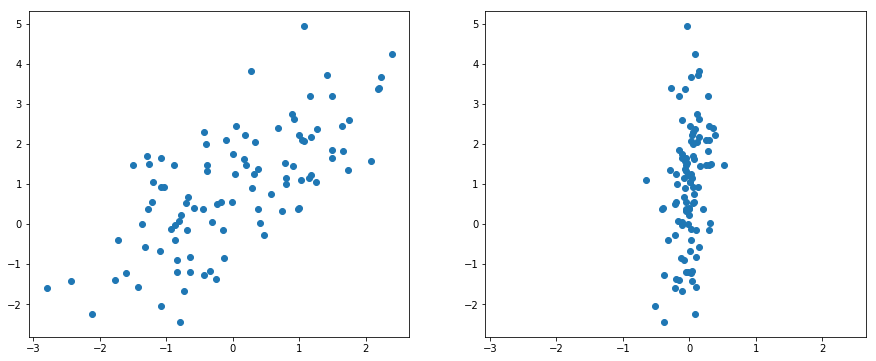

In [9]:
# initialize random numbers
np.random.seed(123)

# true parameters
alpha, sigma = 1,1
beta = [1, 2.5]

N = 100 # size of the dataset

# predictor variables
X1 = np.random.randn(N)
X2 = np.random.randn(N) * 0.2

# simulate outcome variable. We are interested in predicting outcomes Y as normally-distributed 
# observations with an expected value μ that is a linear function of two predictor variables, X1 
# and X2. Alpha is the intercept.
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(N) * sigma

#plot
fig, ax = plt.subplots(1,2, sharex=True, figsize =[15,6])
ax[0].scatter(X1, Y)
ax[1].scatter(X2, Y)

In [14]:
# create container for model random variables
basic_model = pm.Model()

with basic_model:
    
    #priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)
    
    # having defined the priors, the expected value mu of outcomes specifying the linear relation
    mu = alpha + beta[0] *X1 + beta[1] * X2
    
    # likelihood (sampling distribution) of observations
    y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed = Y)

The 'observed' argument, passes data to the variable, indicating that the values for this variable were observed, and should not be changed by any fitting algorithm applied to the model. 

Having completely specified our model, the next step is to **obtain posterior estimates for the unknown variables in the model**. Ideally, we could calculate the posterior estimates analytically, but for most non-trivial models, this is not feasible. We will consider two approaches, whose appropriateness depends on the structure of the model and the goals of the analysis: finding the maximum a posteriori (MAP) point using optimization methods, and computing summaries based on samples drawn from the posterior distribution using Markov Chain Monte Carlo (MCMC) sampling methods.

- 1) The **maximum a posteriori (MAP)** estimate for a model, is the mode of the posterior distribution and is generally found using numerical optimization methods. This is often fast and easy to do, but only gives a point estimate for the parameters and can be biased if the mode isn’t representative of the distribution. Though finding the MAP is a fast and easy way of obtaining estimates of the unknown model parameters, it is limited because there is no associated estimate of uncertainty produced with the MAP estimates. 

In [15]:
map_estimate = pm.find_MAP(model = basic_model)

Optimization terminated successfully.
         Current function value: 149.017982
         Iterations: 16
         Function evaluations: 21
         Gradient evaluations: 21


In [16]:
map_estimate

{'alpha': array(0.9065985497559482),
 'beta': array([ 0.94848602,  2.60705514]),
 'sigma_log__': array(-0.03278147017403045)}

- 2) a simulation-based approach such as **Markov chain Monte Carlo (MCMC)** can be used to obtain a Markov chain of values that, given the satisfaction of certain conditions, are indistinguishable from samples from the posterior distribution. To conduct MCMC sampling to generate posterior samples in PyMC3, we specify a step method object that corresponds to a particular MCMC algorithm, such as Metropolis, Slice sampling, or the No-U-Turn Sampler (NUTS)

PyMC3’s most capable step method is the **No-U-Turn Sampler**. NUTS is especially useful on models that have many continuous parameters, a situation where other MCMC algorithms work very slowly. **It takes advantage of information about where regions of higher probability are, based on the gradient of the log posterior-density. This helps it achieve dramatically faster convergence on large problems than traditional sampling methods achieve**

NUTS requires a scaling matrix parameter, which is analogous to the variance parameter for the jump proposal distribution in Metropolis-Hastings, although NUTS uses it somewhat differently. The matrix gives the rough shape of the distribution so that NUTS does not make jumps that are too large in some directions and too small in other directions. It is important to set this scaling parameter to a reasonable value to facilitate efficient sampling. 

Fortunately PyMC3 automatically initializes NUTS using another inference algorithm called **ADVI (auto-diff variational inference)**. If you don't specify a sampler via the *step* keyword, PyMC3 automatically assigns NUTS and ADVI:

In [17]:
from scipy import optimize

with basic_model:
    # draw 500 posterior samples
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 154.13:   7%|▊           | 13698/200000 [02:37<38:35, 80.47it/s]
Convergence archived at 13700
Interrupted at 13,700 [6%]: Average Loss = 226.6
100%|██████████████████████████████████████| 1000/1000 [01:26<00:00, 11.56it/s]


In [18]:
# trace object contains the samples collected with varnames ['alpha', 'beta', 'sigma_log__', 'sigma']
trace

<MultiTrace: 1 chains, 500 iterations, 4 variables>

In [23]:
trace['alpha'][-5:]

array([ 0.90440178,  0.89622548,  0.84447965,  0.97618376,  0.83744677])

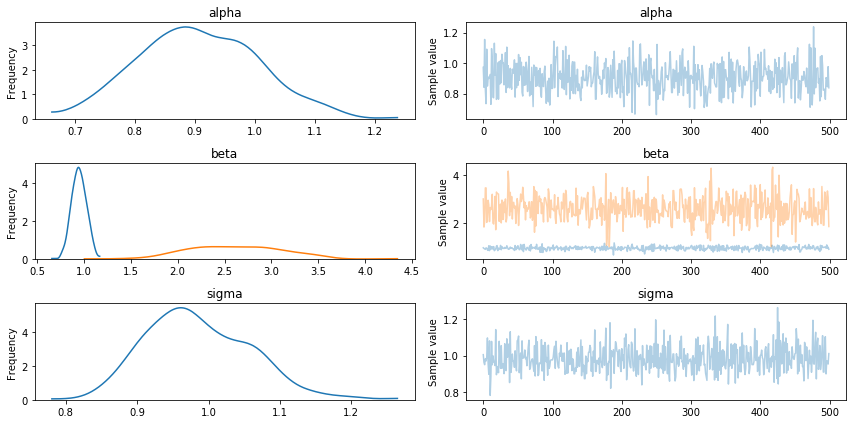

In [25]:
# for the posterior analysis PyMC3 provides summarization plots:
pm.traceplot(trace);

The left column consists of a smoothed histogram (using kernel density estimation) of the marginal posteriors of each stochastic random variable while the right column contains the samples of the Markov chain plotted in sequential order. Beta produces 2 histograms  2 sample traces corresponding to both predictor coefficients. Note that the values for Beta are very close to 1, 2.5 , close to the true parameters of the model.

In addition, we can see that the MCMC sampling procedure has "converged to the distribution" since the sampling series looks stationary (plots at the right)

In [26]:
# summary function for text-based summary:
pm.summary(trace)


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.907            0.098            0.004            [0.725, 1.105]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.724          0.838          0.900          0.976          1.105


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.946            0.078            0.003            [0.805, 1.104]
  2.617            0.532            0.019            [1.685, 3.604]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.796          0.893          0.943          0.999          1.100
  1.613          2.243          2.600   

### A Classic: the flip coin

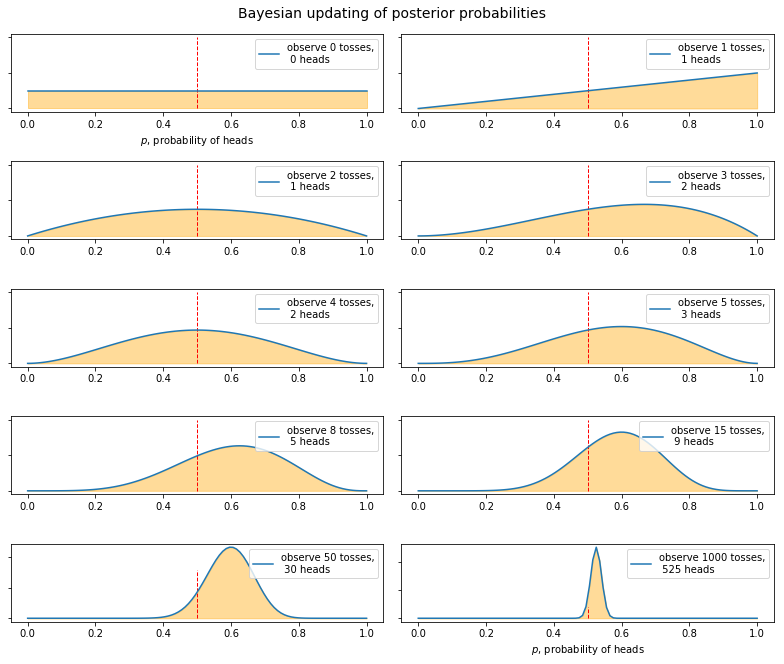

In [2]:
dist = stats.beta # beta continuous random variable
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 1000]
data= stats.bernoulli.rvs(.5, size= n_trials[-1]) # random variates from Bernoulli distribution
x = np.linspace(0, 1, 100)

fig, axes = plt.subplots(5, 2, sharex = False, figsize = [11,9])
axes = axes.flatten()

for k, N in enumerate(n_trials):
    
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    axes[k].plot(x, y, label="observe {} tosses,\n {} heads".format(N, heads))
    axes[k].fill_between(x, 0, y, color="orange", alpha=0.4)
    axes[k].vlines(0.5, 0, 4, color="red", linestyles="--", lw=1)
    axes[k].set(xlabel = (("$p$, probability of heads") if k in [0, len(n_trials) - 1] else ' '), 
                yticklabels= [])
    axes[k].legend(loc = 'upper right')

fig.suptitle("Bayesian updating of posterior probabilities", y=1.02, fontsize=14)
fig.tight_layout()

The posterior probabilities are represented by the curves, and our uncertainty is proportional to the width of the curve. As the plot above shows, as we start to observe more data our posterior probabilities start to shift and move around. Eventually, as we observe more and more data, probabilities will tighten closer and closer around the true value of $p=0.5$ (marked by a dashed line).

### Constructing a Markov chain to do Monte Carlo approximation

** Let's generate 20 points from a normal distribution centered around 0. We need to estimate the posterior of the mean $\mu$ assuming the standard deviation is 1

In [12]:
from scipy.stats import norm
np.random.seed(145)
data = np.random.randn(200)

(-3, 3)

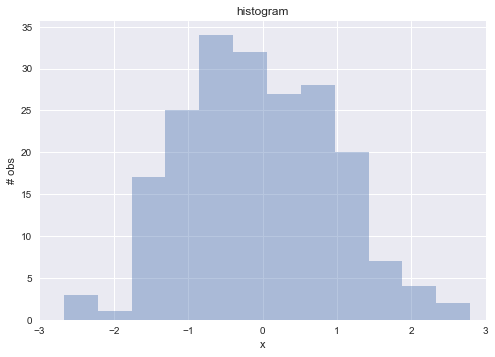

In [13]:
sns.distplot(data, kde = False)
plt.title('histogram'); plt.xlabel('x'); plt.ylabel('# obs'); plt.xlim(-3,3)

Next, we have to define our model. In this simple case, we will assume that this data is normal distributed, i.e. the likelihood of the model is normal. Normal distributions have 2 parameters -- mean $\mu$ and standard deviation $\sigma$. For simplicity, we'll assume we know that $\sigma = 1$ and we'll want to infer the posterior for $\mu$. For each parameter we want to infer, we have to chose a prior. For simplicity, lets also assume a Normal distribution as a prior for $\mu$. Thus, in stats speak our model is:

$μ∼Normal(0,1)$

$x|μ∼Normal(x;μ,1)$



What is convenient, is that for this model, we actually can compute the posterior analytically. That's because for a normal likelihood with known standard deviation, the normal prior for $\mu$ is conjugate (conjugate here means that our posterior will follow the same distribution as the prior), so we know that our posterior for $\mu$ is also normal. 

In [24]:
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

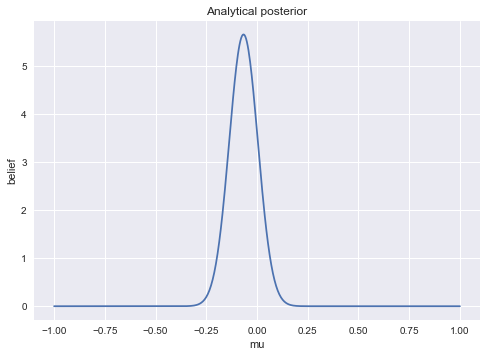

In [25]:
x = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, x, 0., 1.)
plt.plot(x, posterior_analytical)
plt.xlabel('mu');plt.ylabel('belief');plt.title('Analytical posterior')
sns.despine()

This shows our quantity of interest, the probability of $\mu$'s values after having seen the data, taking our prior information into account. For Bayesians to make a prediction is to marginalize out the parameters. For each possible value of $\theta$ your prediction is weighted by the posterior and is a **weighted prediction**

The frequentists to make a prediction, just use the likelihood (x * $\theta$ gives the prediction). In the Bayesian approach, each $\theta$ gets weighted by its posterior distribution, so it's an ensemble predictor. 

let $x_{*}$ be a new input. The prediction, given the training data $D = (X, y)$ is:

**Bayesian:**
$P(y \rvert x_{*}, D, \sigma^{2}) = \int \mathcal{N}(y \rvert x_{*}^T \theta, \sigma^{2}) \hspace{2mm}\mathcal{N}(\theta \rvert\theta_{n}, V_{n})d\theta$

$= \mathcal{N}(y\rvert x_{*}^T \theta_{n}, \sigma^{2} + \underset{new \hspace{1mm} term **}{x_{*}^T V_{n} x_{*})}$

**ML plugin predictor** on the other hand is:

$P(y\rvert x_{*}, D, \sigma^{2}) = \mathcal{N}(y\rvert x_{*}^{T} \theta_{ML}, \sigma^{2})$ where we did x times $\theta$ assuming some variance. The ML way assumes there is 1 single $\theta$. Bayesians assume there is an infinite number of $\theta$s and you should weigh each prediction by that value of $\theta$. 

The implication is that the $\theta_{ML}$ approach and the $\theta_{N}$ approach (Bayesian) might not be that different, note that both expression have the same sigma but in the Bayesian schema there is a new term ($x_{*}^{T}V_{n}x_{*}$) that appears (underscored in the Latex call) and that term has the new input data (X) and the matrix V (Inverse that has to do with the data training data $X^{T}X$). For Bayesian approach, because all estimates are distributed according to a Gaussian dsitribution, this extra term ensures that where we have data the height of the bars are affected and we are confident about our estimate (as opposed to MLE where all the estimates have the same width) We shouldn't be confident when there is no data and this is where MLE fails quit badly!

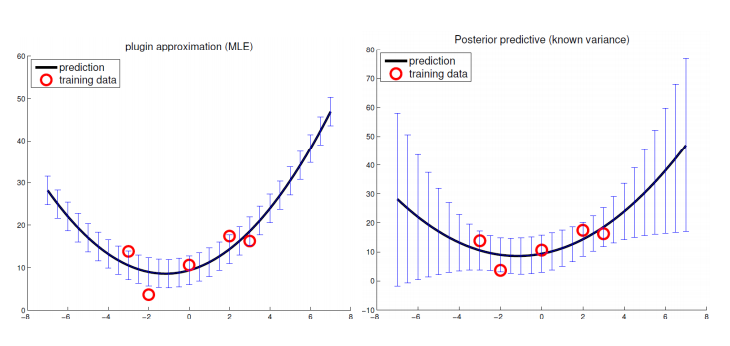

In [24]:
Image(filename = PATH + "mle_vs_bayesian.png", width=800, height=200)

### more MCMC sampling

Source = http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/

Lets assume, however, that our prior wasn't conjugate and we couldn't solve this by hand which is usually the case. At first we start with a parameter position (can be random), then we propose to move from that position to somewhere else. The **Metropolis** sampler is dumb and just takes samples from the Normal distribution centered around your *mu_current* with a certain standard devation *proposal_width* that determines how far we can jump.

In [39]:
from copy import copy

def sampler(data, samples=4, mu_init=.5, proposal_width=.5, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    
    mu_current = mu_init
    posterior = [mu_current] # to append posterior updates to
    
    for i in range(samples):
        """
        Suggest new position. We need to evaluate if the next place is a good place to jump to by 
        evaluating if the normal distribution with the proposed $\mu$ 'explains' the data better 
        (we quantify fit by computing the probability of the data, given the likelihood with the 
        proposed values (proposed MU and SIGMA=1). 
        This is easy to calculate by using **scipy.stats.normal(mu, sigma).pdf(data)** and then 
        multiplying the individual probabilities, i.e. compute the likelihood:
        """
        
        mu_proposal = norm(mu_current, proposal_width).rvs() # rvs: Random variates of given type.

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        
        """
        Until now, we essentially have a hill-climbing algorithm that would just propose movements 
        into random directions and only accept a jump if the mu_proposal has higher likelihood than 
        mu_current. Eventually we'll get to mu = 0 (or close to it) from where no more moves will be 
        possible. However, we want to get a posterior so we'll also have to sometimes accept moves 
        into the other direction. The key trick is by dividing the two probabilities,
        """
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand() < p_accept
        
        if plot:
            plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accept, 
                          posterior, i)
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        
    return posterior

# Function to display
def plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accepted, trace, i):
    
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('Iteration %i' % (i + 1))
    x = np.linspace(-3, 3, 5000)
    color = 'g' if accepted else 'r'
        
    # Plot prior
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    prior = norm(mu_prior_mu, mu_prior_sd).pdf(x)
    ax1.plot(x, prior)
    ax1.plot([mu_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([mu_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', 
            title='current: prior(mu=%.2f) = %.2f\nproposal: prior(mu=%.2f) = %.2f' % 
            (mu_current, prior_current, mu_proposal, prior_proposal))
    
    # Likelihood
    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
    y = norm(loc=mu_proposal, scale=1).pdf(x)
    sns.distplot(data, kde=False, norm_hist=True, ax=ax2)
    ax2.plot(x, y, color=color)
    ax2.axvline(mu_current, color='b', linestyle='--', label='mu_current')
    ax2.axvline(mu_proposal, color=color, linestyle='--', label='mu_proposal')
    #ax2.title('Proposal {}'.format('accepted' if accepted else 'rejected'))
    ax2.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=(dict(arrowstyle="->", lw=2.)))
    ax2.set(title='likelihood(mu=%.2f) = %.2f\nlikelihood(mu=%.2f) = %.2f' % 
            (mu_current, 1e14*likelihood_current, mu_proposal, 1e14*likelihood_proposal))
    
    # Posterior
    posterior_analytical = calc_posterior_analytical(data, x, mu_prior_mu, mu_prior_sd)
    ax3.plot(x, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, mu_current, mu_prior_mu, mu_prior_sd)
    posterior_proposal = calc_posterior_analytical(data, mu_proposal, mu_prior_mu, mu_prior_sd)
    ax3.plot([mu_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([mu_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    #x3.set(title=r'prior x likelihood $\propto$ posterior')
    ax3.set(title='posterior(mu=%.2f) = %.5f\nposterior(mu=%.2f) = %.5f' % 
            (mu_current, posterior_current, mu_proposal, posterior_proposal))
    
    if accepted:
        trace.append(mu_proposal)
    else:
        trace.append(mu_current)
    ax4.plot(trace)
    ax4.set(xlabel='iteration', ylabel='mu', title='trace')
    plt.tight_layout()  

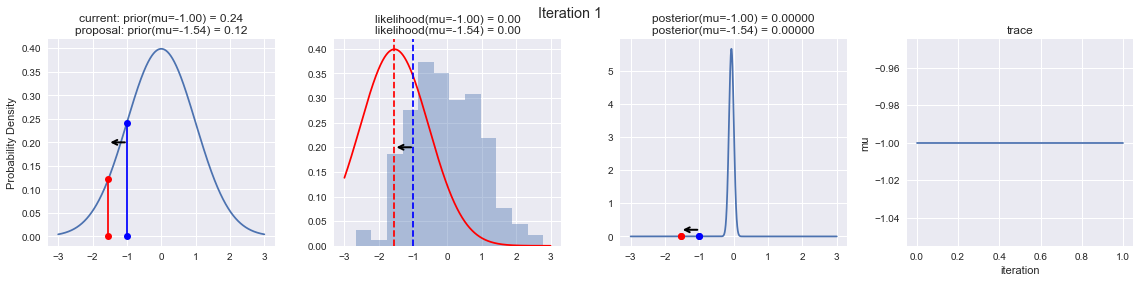

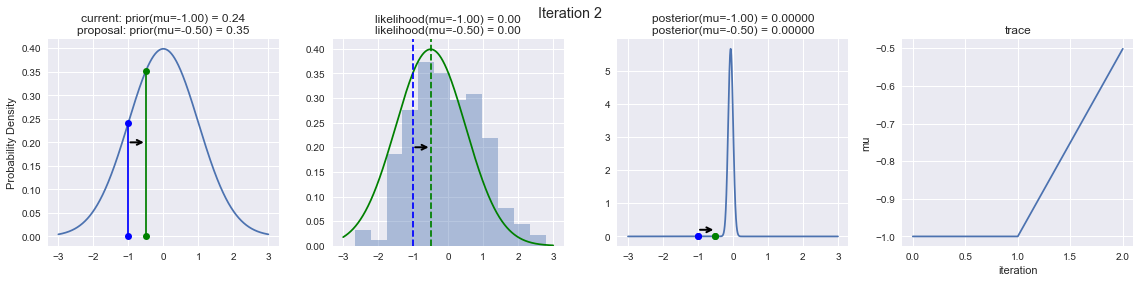

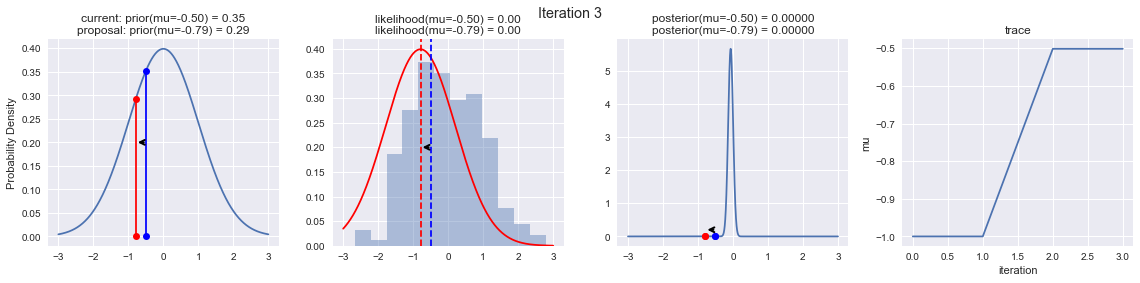

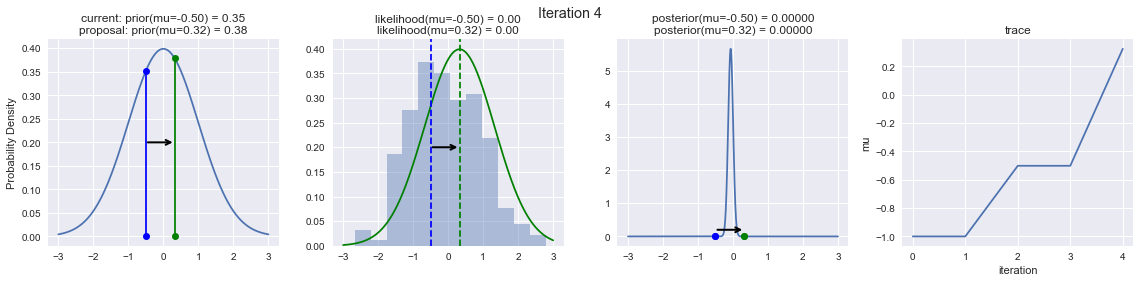

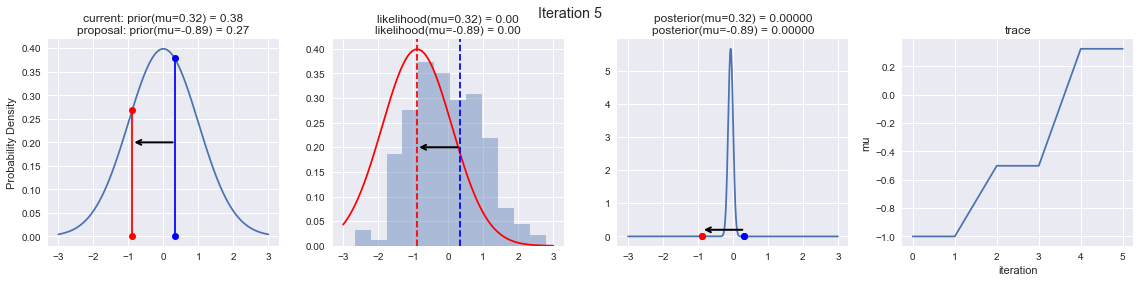

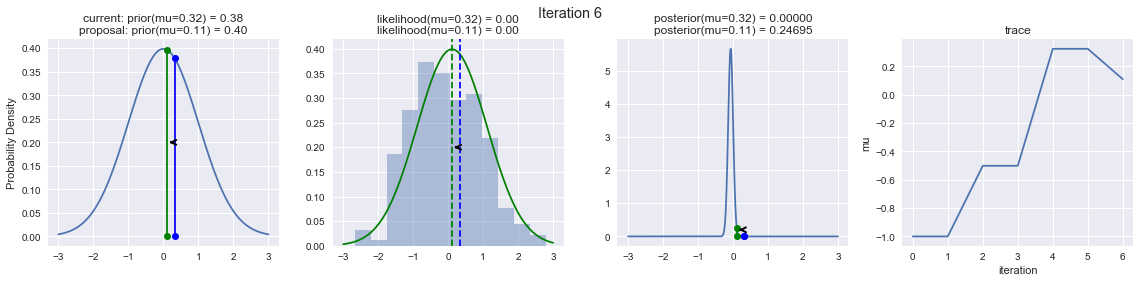

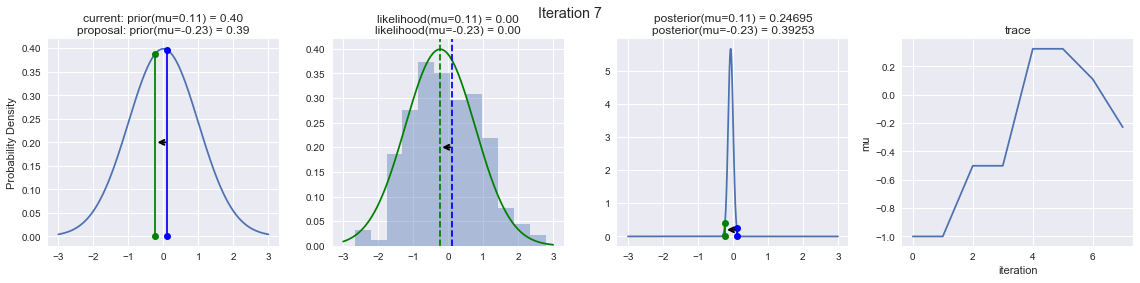

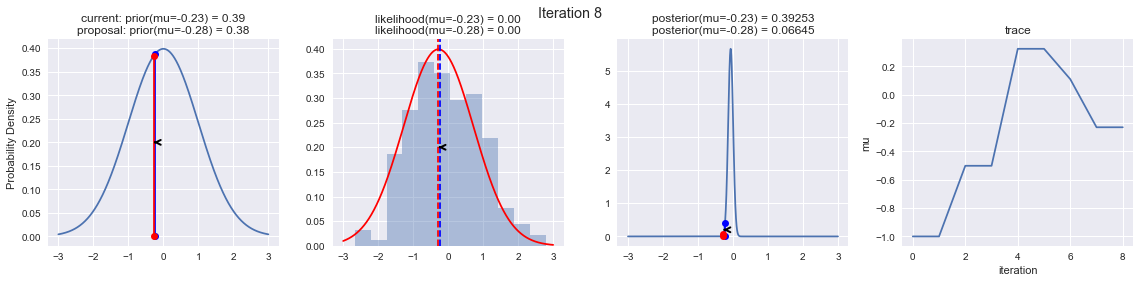

In [42]:
np.random.seed(123)
sampler(data, samples=8, mu_init=-1., plot=True);

 - First column --> prior distribution, what our belief about $\mu$ is before seeing the data. The distribution is static and we only plug in our $\underset{proposals}\mu$. The vertical lines represent our current $\mu$ in blue and our $\mu \hspace{1mm} proposed$ in red (rejected) or green (accepted)
 
 
 - Second column is our likelihood that we use to evaluate how good our model explains the data. The likelihood function changes in response tot he proposed $\mu \hspace{1mm} proposed$. The blue histogram is our data. The solid line in green or red is the likelihood with the currently proposed $\mu$. Intuitively, the more overlap there is between likelihood and data, the better the model explains the data and the higher the resulting probability will be. The dotted line of the same color is the $\mu \hspace{1mm} proposed$ and the dotted blue line is the current $\mu$.
 
 
 - Third column is our posterior distribution. Here the normalized posterior is displayed but as we found out above, we can just multiply the prior value for the current and proposed $\mu$'s by the likelihood value for the two $\mu$'s to get the unnormalized posterior values (which we use for the actual computation), and divide one by the other to get our acceptance probability.
 
 
 - The 4th column is our trace (i.e. the posterior samples of $\mu$ we're generating) where we store each sample irrespective of whether it was accepted or rejected (in which case the line just stays constant).

You just have to conitnue doing this for a long time and the generated samples will come from the posterior distribution. This will produce the trace:

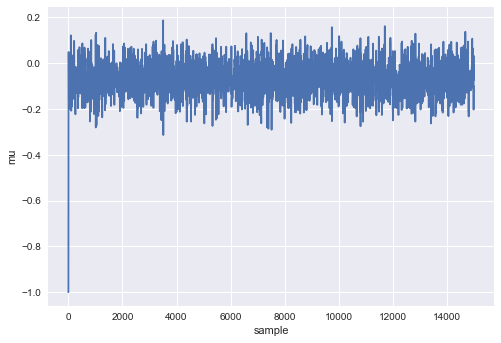

In [44]:
posterior =  sampler(data, samples= 15000, mu_init=-1)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel= 'mu')

to get an approximation of the posterior, we histogram.  It's important to keep in mind that although this looks similar to the data we sampled above to fit the model, the two are completely separate. The below plot represents our belief in mu. In this case it just happens to also be normal but for a different model, it could have a completely different shape than the likelihood or prior.

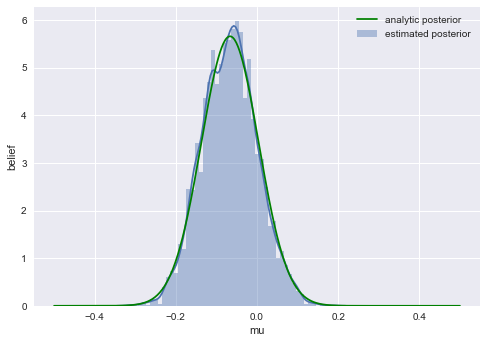

In [56]:
ax = plt.subplot()

sns.distplot(posterior[500:], ax=ax, label='estimated posterior')
x = np.linspace(-.5, .5, 500)
post = calc_posterior_analytical(data, x, 0, 1)
ax.plot(x, post, 'g', label='analytic posterior')
_ = ax.set(xlabel='mu', ylabel='belief');
ax.legend();

Above we set the proposal width to 0.5. That turned out to be a pretty good value. In general you don't want the width to be too narrow because your sampling will be inefficient as it takes a long time to explore the whole parameter space and shows the typical random-walk behavior:

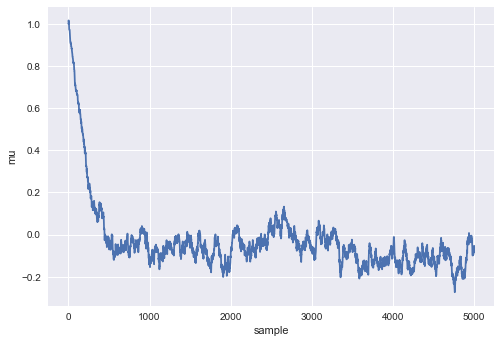

In [57]:
posterior_small = sampler(data, samples=5000, mu_init=1., proposal_width=.01)
fig, ax = plt.subplots()
ax.plot(posterior_small);
_ = ax.set(xlabel='sample', ylabel='mu');

But you also don't want it to be so large that you never accept a jump:

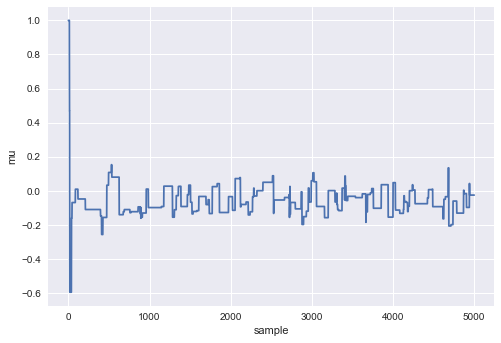

In [58]:
posterior_large = sampler(data, samples=5000, mu_init=1., proposal_width=3.)
fig, ax = plt.subplots()
ax.plot(posterior_large); plt.xlabel('sample'); plt.ylabel('mu');
_ = ax.set(xlabel='sample', ylabel='mu');

Note, however, that we are still sampling from our target posterior distribution here as guaranteed by the mathemtical proof, just less efficiently:

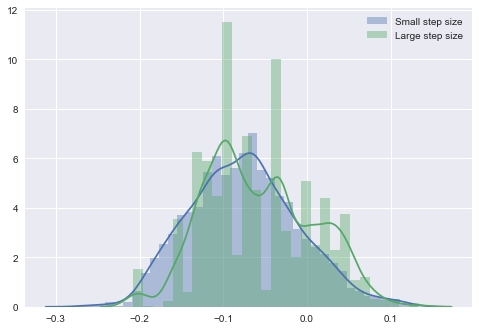

In [59]:
sns.distplot(posterior_small[1000:], label='Small step size')
sns.distplot(posterior_large[1000:], label='Large step size');
_ = plt.legend();

With more samples this will eventually look like the true posterior. The key is that we want our samples to be independent of each other which cleary isn't the case here. Thus, one common metric to evaluate the efficiency of our sampler is the autocorrelation -- i.e. how correlated a sample i is to sample i-1, i-2, etc:

Obviously we want to have a smart way of figuring out the right step width automatically. One common method is to keep adjusting the proposal width so that roughly 50% proposals are rejected.

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


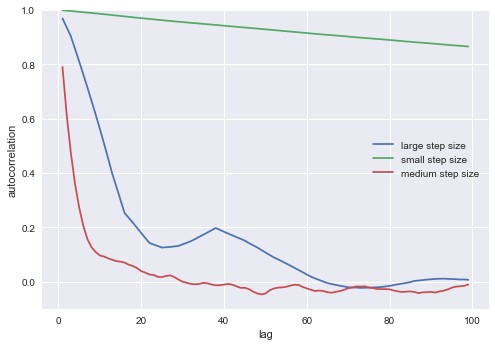

In [60]:
from pymc3.stats import autocorr
lags = np.arange(1, 100)
fig, ax = plt.subplots()
ax.plot(lags, [autocorr(posterior_large, l) for l in lags], label='large step size')
ax.plot(lags, [autocorr(posterior_small, l) for l in lags], label='small step size')
ax.plot(lags, [autocorr(posterior, l) for l in lags], label='medium step size')
ax.legend(loc=0)
_ = ax.set(xlabel='lag', ylabel='autocorrelation', ylim=(-.1, 1))

### Extending to sigma

Now you can easily imagine that we could also add a sigma parameter for the standard-deviation and follow the same procedure for this second parameter. In that case, we would be generating proposals for $\mu$ and $\sigma$ but the algorithm logic would be nearly identical. Or, we could have data from a very different distribution like a Binomial and still use the same algorithm and get the correct posterior. That's pretty cool and a huge benefit of probabilistic programming: Just define the model you want and let MCMC take care of the inference.

100%|███████████████████████████████████| 15500/15500 [00:39<00:00, 388.08it/s]


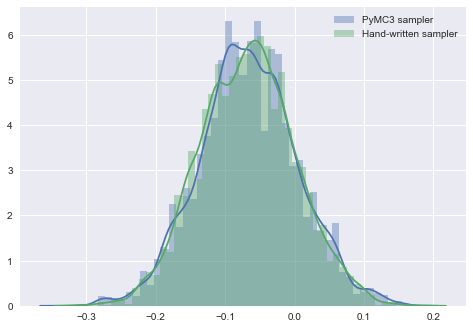

In [62]:
# plug in PyMC3
import pymc3 as pm

with pm.Model():
    mu = pm.Normal('mu', 0, 1)
    sigma= 1
    returns = pm.Normal('returns', mu=mu, sd= sigma, observed= data)
    
    step = pm.Metropolis()
    trace = pm.sample(15000, step)

sns.distplot(trace[2000:]['mu'], label='PyMC3 sampler');
sns.distplot(posterior[500:], label='Hand-written sampler');
plt.legend();